<a href="https://colab.research.google.com/github/YUMA-NAGAO/Portfolio_1st_Year/blob/master/LearningKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新しいセクション

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ダミーデータ
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 2))

# モデルの学習。32サンプルずつ取り出して学習する
# サンプル数(batch_size)が増えれば増えるほど、高速に学習が終わるが学習がうまく進まない可能性がある
history = model.fit(data, labels, epochs=100, batch_size=32)

# 乱数を入力にして予測をさせる
model.predict(np.random.random((1, 100)))
# 出力例:
# array([[0.48207587]], dtype=float32)

Epoch 1/100
1000/1000 [==============================] - 0s 373us/step - loss: 0.7025 - acc: 0.5005
Epoch 2/100
1000/1000 [==============================] - 0s 132us/step - loss: 0.6943 - acc: 0.5215
Epoch 3/100
1000/1000 [==============================] - 0s 126us/step - loss: 0.6905 - acc: 0.5425
Epoch 4/100
1000/1000 [==============================] - 0s 120us/step - loss: 0.6855 - acc: 0.5665
Epoch 5/100
1000/1000 [==============================] - 0s 127us/step - loss: 0.6843 - acc: 0.5600
Epoch 6/100
1000/1000 [==============================] - 0s 127us/step - loss: 0.6809 - acc: 0.5605
Epoch 7/100
1000/1000 [==============================] - 0s 136us/step - loss: 0.6780 - acc: 0.5750
Epoch 8/100
1000/1000 [==============================] - 0s 125us/step - loss: 0.6750 - acc: 0.5830
Epoch 9/100
1000/1000 [==============================] - 0s 119us/step - loss: 0.6715 - acc: 0.5885
Epoch 10/100
1000/1000 [==============================] - 0s 125us/step - loss: 0.6693 - acc: 0.5905

array([[0.68405855, 0.28261983]], dtype=float32)

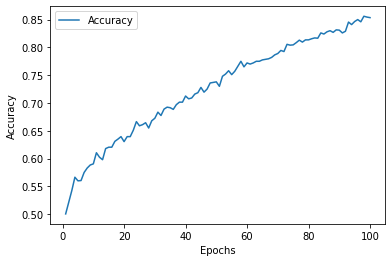

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, history.params['epochs']+1), history.history['acc'], label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

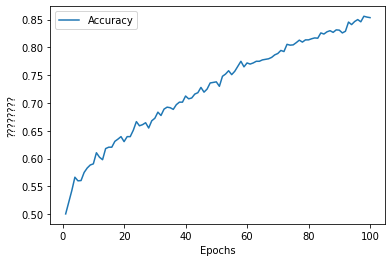

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, history.params['epochs']+1), history.history['acc'], label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('????????')
plt.legend()
plt.show()

In [0]:
history.params

{'batch_size': 32,
 'do_validation': False,
 'epochs': 100,
 'metrics': ['loss', 'acc'],
 'samples': 1000,
 'steps': None,
 'verbose': 1}

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

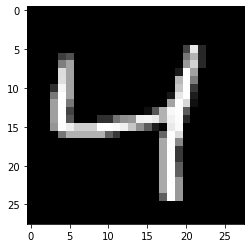

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[2], cmap='gray')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # input_shapeは 画像サイズに準ずる
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 過学習を防ぐために、ノードからの伝搬を確率的に落とす
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 過学習を防ぐために、ノードからの伝搬を確率的に落とす
model.add(Dense(10, activation='softmax')) # 10次元ベクトル。各値は0〜1である

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

Total params: 1,199,882  
このモデルでは、短いコードで、パラメータがこのようになっている  
Trainable params: 1,199,882  
Non-trainable params: 0

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

# 学習用とテスト用に分離する
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# n, height, width, 1 の形式に変換
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# 学習を安定させるために最小値0, 最大値1に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one hotベクトルへの変換
# ベクトルのうち、1つだけが1でほかが0であるようなベクトルのこと。今回はsoftmaxを使うため。
# see: https://qiita.com/JeJeNeNo/items/8a7c1781f6a6ad522adf
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# テスト用のデータでモデルの正確度を確かめる
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # 99%超え

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.2671 - acc: 0.9177 - val_loss: 0.0536 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0868 - acc: 0.9741 - val_loss: 0.0425 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0671 - acc: 0.9798 - val_loss: 0.0330 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0546 - acc: 0.9839 - val_loss: 0.0322 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0476 - acc: 0.9857 - val_loss: 0.0301 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0268 - val_acc: 0.9912
Epoch 7/12
60000/60000 [==============================]

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

# 学習用とテスト用に分離する
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# n, height, width, 1 の形式に変換
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# 学習を安定させるために最小値0, 最大値1に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one hotベクトルへの変換
# ベクトルのうち、1つだけが1でほかが0であるようなベクトルのこと。今回はsoftmaxを使うため。
# see: https://qiita.com/JeJeNeNo/items/8a7c1781f6a6ad522adf
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# テスト用のデータでモデルの正確度を確かめる
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # 99%超え

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.2689 - acc: 0.9162 - val_loss: 0.0569 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0894 - acc: 0.9739 - val_loss: 0.0443 - val_acc: 0.9839
Epoch 3/12
60000/60000 [==============================] - 4s 72us/step - loss: 0.0653 - acc: 0.9804 - val_loss: 0.0337 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0549 - acc: 0.9833 - val_loss: 0.0335 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0496 - acc: 0.9856 - val_loss: 0.0271 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 4s 73us/step - loss: 0.0423 - acc: 0.9876 - val_loss: 0.0267 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================]

In [0]:
!curl 'https://placehold.jp/24/000000/ffffff/28x28.png?text=3' -o six.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   432  100   432    0     0    677      0 --:--:-- --:--:-- --:--:--   677


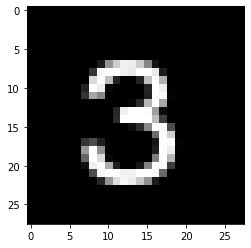

In [0]:
from matplotlib import image
image = image.imread('six.png')
plt.imshow(image, cmap='gray')

In [0]:
# 入力の形状は原則 (n, height, width, 1) になる
images = image.reshape(1, img_rows, img_cols, 1)
result = model.predict(images)
result

array([[1.4663973e-11, 3.2275755e-12, 7.3074777e-09, 9.9999976e-01,
        6.8801839e-16, 2.0479439e-08, 1.3219524e-15, 1.0583370e-09,
        5.6296177e-09, 2.4513616e-07]], dtype=float32)

In [0]:
import numpy as np
np.argmax(result[0]) # 結論

3